In [1]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [2]:
print(iris_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print(type(iris_data.data))
print(iris_data.data.shape)
print(iris_data.target.shape)

<class 'numpy.ndarray'>
(150, 4)
(150,)


In [5]:
print(iris_data.data[0])
print(iris_data.target[0:5])

[5.1 3.5 1.4 0.2]
[0 0 0 0 0]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(105, 4) (105,) (45, 4) (45,)


In [7]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=5000)

In [8]:
logistic = logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
print('LogisticRegression score:{}'.format(score))

LogisticRegression score:1.0


In [9]:
ypred_test= logistic.predict(X_test)
print(ypred_test)

[1 1 2 1 0 0 2 2 1 2 2 1 1 1 1 0 0 2 2 0 2 0 1 1 2 1 1 2 2 0 0 2 1 0 0 2 0
 2 2 1 2 2 0 1 0]


In [10]:
print(y_test)

[1 1 2 1 0 0 2 2 1 2 2 1 1 1 1 0 0 2 2 0 2 0 1 1 2 1 1 2 2 0 0 2 1 0 0 2 0
 2 2 1 2 2 0 1 0]


In [22]:
for i in range(len(y_test)):
    if (y_test[i] != ypred_test[i]):
        print(i, y_test[i], ypred_test[i])

In [23]:
print("classes", logistic.classes_)
print("Total feature weights", logistic.coef_.shape)
print("Total Bias weights", logistic.intercept_.shape) 
print("Total iterations", logistic.n_iter_) 

classes [0 1 2]
Total feature weights (3, 4)
Total Bias weights (3,)
Total iterations [113]


In [13]:
ypred_logproba= logistic.predict_log_proba(X_test[0:2])
print(ypred_logproba)
ypred_proba= logistic.predict_proba(X_test[0:2])
print(ypred_proba)

[[-4.27255909 -0.32824891 -1.32474702]
 [-4.59610432 -0.20095554 -1.76049263]]
[[0.01394605 0.72018374 0.26587021]
 [0.01009107 0.8179488  0.17196013]]


In [14]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
train_score = neigh.score(X_train, y_train)
test_score = neigh.score(X_test, y_test)
print('Knn with K =3 train score:{}'.format(train_score))
print('Knn with K =3 test score:{}'.format(test_score))

Knn with K =3 train score:0.9523809523809523
Knn with K =3 test score:0.9777777777777777


In [15]:
neigh.kneighbors(X_test)

(array([[0.2       , 0.3       , 0.38729833],
        [0.26457513, 0.31622777, 0.34641016],
        [0.3       , 0.31622777, 0.4       ],
        [0.2       , 0.24494897, 0.3       ],
        [0.14142136, 0.14142136, 0.17320508],
        [0.36055513, 0.37416574, 0.41231056],
        [0.24494897, 0.36055513, 0.42426407],
        [0.63245553, 0.67082039, 0.75498344],
        [0.26457513, 0.31622777, 0.42426407],
        [0.        , 0.26457513, 0.31622777],
        [0.33166248, 0.36055513, 0.37416574],
        [0.24494897, 0.31622777, 0.37416574],
        [0.50990195, 0.51961524, 0.53851648],
        [0.24494897, 0.26457513, 0.26457513],
        [0.14142136, 0.3       , 0.34641016],
        [0.14142136, 0.17320508, 0.26457513],
        [0.2       , 0.2236068 , 0.2236068 ],
        [0.17320508, 0.36055513, 0.37416574],
        [0.26457513, 0.34641016, 0.37416574],
        [0.14142136, 0.14142136, 0.14142136],
        [0.41231056, 0.7       , 0.96953597],
        [0.34641016, 0.34641016, 0

In [16]:
neigh.kneighbors_graph(X_test[0:3], mode='distance').toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.38729833, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X_train, y_train)
train_score = neigh.score(X_train, y_train)
test_score = neigh.score(X_test, y_test)
print('Knn with K =3 train score:{}'.format(train_score))
print('Knn with K =3 test score:{}'.format(test_score))
    

Knn with K =3 train score:1.0
Knn with K =3 test score:0.9777777777777777


In [18]:
neigh = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
neigh.fit(X_train, y_train)
train_score = neigh.score(X_train, y_train)
test_score = neigh.score(X_test, y_test)
print('Knn with K =3 train score:{}'.format(train_score))
print('Knn with K =3 test score:{}'.format(test_score))


Knn with K =3 train score:0.9428571428571428
Knn with K =3 test score:0.9777777777777777


In [19]:
from sklearn.metrics import confusion_matrix
y_pred = neigh.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  0]
 [ 0  1 16]]


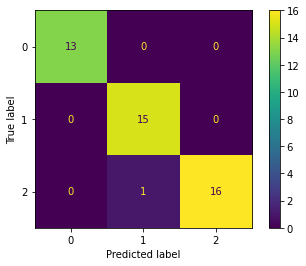

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=iris_data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
#Exercises
# 1. Try KNeighborsClassifier() on breast_cancer data for teh follwoing parameetrs
#    different K values
#    different distance metrics (manhattan, euclidean etc.)
#    weights of the neigbours (uniform, distance etc..)
#    different data structures, bruteforce, kdtree, balltree
#    diffeerent leaf node sizes
#    print k neighbors graph
#    draw plot - K vs test accuracy

# 2. Try RadiusNeighborsClassifier() on wines dataset 
#    for various r params
#    draw plot -  r vs test accuracy

# 3. Try KNeighborsRegressor() on boston house prices dataset or Diabetes dataset
#    different K values
#    different distance metrics (manhattan, euclidean etc.)
#    weights of the neigbours (uniform, distance etc..)
#    different data structures, bruteforce, kdtree, balltree
#    diffeerent leaf node sizes
#    print k neighbors graph
#    draw plot - K vs test accuracy